# Importing Libraries

In [34]:
import numpy as np 

# handling dataset
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [35]:
# reading data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\Third\titanic_train.csv') 

In [36]:
df.head() # to display data from top 5 only 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dataset Description

1--- PassengerId ( in continous integers)

2--- Survived   (0=No, 1=Yes)

3--- Pclass  Ticket class (1=1st, 2=2nd, 3=3rd)

4--- Name  (names of passengers aboard the titanic)

5--- Sex   (in category male, female)

6--- Age (in years)

7--- SibSp  (siblings/spouses aboard the titanic)

8--- Parch  (parents/children aboard the titanic)

9--- Ticket (Unique ticket ID/number)

10--- Fare (amount of money spended)

11--- Cabin  (cabin number)

12--- Embarked ( S = Southampton, C = Cherbough, Q=Queenstown)

In [37]:
print('Total no of rows & columns :', df.shape) # to display total no of rows & columns

Total no of rows & columns : (891, 12)


In [38]:
df.columns # to display all columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df.isnull().sum() # Checking null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
# % of null values in Cabin
(df['Cabin'].isnull().sum()/len(df['Cabin']))*100

77.10437710437711

In [43]:
# dropping Cabin column as this feature was having high % of null values
df=df.drop(columns=['Cabin'])

In [44]:
# % of null values in Age
(df['Age'].isnull().sum()/len(df['Age']))*100

19.865319865319865

In [45]:
df['Age']=df['Age'].replace(np.NaN, df['Age'].mean())

<AxesSubplot:xlabel='Embarked', ylabel='count'>

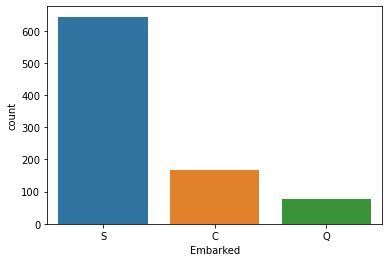

In [46]:
sns.countplot(df['Embarked'])

In [47]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [48]:
df['Embarked']= pd.get_dummies(df["Embarked"]) # converting object into integers

In [49]:
# filling null values 
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())

In [50]:
df.isnull().sum() # now checking for null values again

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now data is with no null values and we can proceed

In [51]:
last_column = df.pop('Survived')

In [52]:
df.insert(10, 'Survived', last_column)  # inserting Survived at the last column 

In [53]:
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,0
5,6,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,0,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,0,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,0,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,1,1


In [54]:
# eliminating these columns as they seem irrelevant for survival prediction
df= df.drop(['Ticket','Name','PassengerId','Fare'], axis=1) 

<AxesSubplot:xlabel='Sex', ylabel='count'>

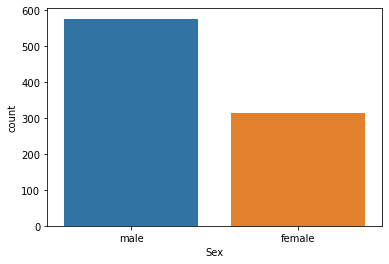

In [55]:
sns.countplot(df['Sex'])

In [56]:
df['Sex']= pd.get_dummies(df["Sex"]) # converting object into integers

In [57]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,0,22.0,1,0,0,0
1,1,1,38.0,1,0,1,1
2,3,1,26.0,0,0,0,1
3,1,1,35.0,1,0,0,1
4,3,0,35.0,0,0,0,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

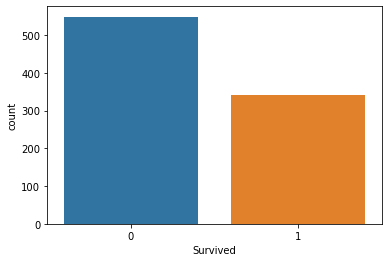

In [58]:
sns.countplot(df['Survived'])

In [59]:
print('Survived no is :',df.Survived.value_counts()[1])
print('Not Survived no is :',df.Survived.value_counts()[0])

Survived no is : 342
Not Survived no is : 549


From the above count the number of survivor is less.

<AxesSubplot:xlabel='Survived', ylabel='count'>

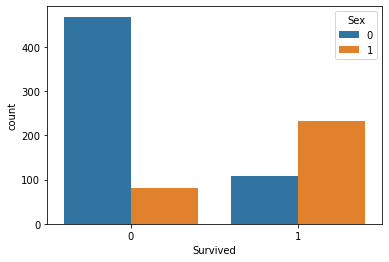

In [60]:
sns.countplot(x='Survived',data=df, hue='Sex')

In [61]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,0,22.0,1,0,0,0
1,1,1,38.0,1,0,1,1
2,3,1,26.0,0,0,0,1
3,1,1,35.0,1,0,0,1
4,3,0,35.0,0,0,0,0


In [62]:
y=df['Survived']
X=df.drop('Survived', axis=1)

In [63]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [64]:
X_scaled

array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.48204268],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361,
         2.0745051 ],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48204268],
       ...,
       [ 0.82737724,  1.35557354,  0.        ,  0.43279337,  2.00893337,
        -0.48204268],
       [-1.56610693, -0.73769513, -0.2846632 , -0.4745452 , -0.47367361,
         2.0745051 ],
       [ 0.82737724, -0.73769513,  0.17706291, -0.4745452 , -0.47367361,
        -0.48204268]])

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

# let check the values
vif

,vif,features
0,1.225630,Pclass
1,1.098730,Sex
2,1.206818,Age
3,1.251199,SibSp
4,1.277724,Parch
5,1.071911,Embarked


### there is no relationship between any features. So there is no multicollinearity exists.

In [66]:
# split data into train and test. Model will be build on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=30)

In [67]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred = log_reg.predict(x_test)

In [69]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7802690582959642

In [70]:
### Cross Validation score to check if the model is overfitting
score= cross_val_score(log_reg,X,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79329609 0.78651685 0.79213483 0.75842697 0.82022472]
0.7901198920343984
0.019686910620459144


In [71]:
# Confusion Matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat

array([[115,  16],
       [ 33,  59]], dtype=int64)

In [72]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [73]:
# breaking down the formula for accuracy
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.7802690582959642

In [74]:
# Precision
Precision=true_positive/(true_positive+false_positive)
Precision

0.8778625954198473

In [75]:
# Recall
Recall=true_positive/(true_positive+false_negative)
Recall

0.777027027027027

In [76]:
# F1 score
F1_score=2*(Recall*Precision)/(Recall+Precision)
F1_score

0.8243727598566308

In [77]:
# Area under curve
auc=roc_auc_score(y_test,y_pred)
auc

0.7595834716229671

# Using Decision Tree Classifier

In [78]:
# Lets first visualize the tree on the data without doing any pre processing
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
dt_clf.score(x_train,y_train)

0.9431137724550899

In [80]:
y_pred = dt_clf.predict(x_test)

In [81]:
# Accuracy of our classification tree
dt_clf.score(x_test,y_test)

0.7488789237668162

In [82]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_clf,X,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.74860335 0.79775281 0.79775281 0.80898876 0.84831461]
0.8002824681438703
0.03183210746243169


### Using GridSearchCV for hyper parameter tuning

In [83]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,10,3),
    'min_samples_leaf' : range (1,10,2),
    'min_samples_split' : range (2,10,2)
}

In [85]:
grid_search = GridSearchCV(estimator=dt_clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

In [86]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [87]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [89]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =8, min_samples_leaf=3, min_samples_split=4)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=4)

In [90]:
dt_clf.score(x_test,y_test)

0.7757847533632287

In [91]:
y_pred = dt_clf.predict(x_test)

In [92]:
accuracy_score(y_test,y_pred)

0.7757847533632287

# Random Forest Classifier

In [93]:
rand_clf = RandomForestClassifier(random_state=41)

In [94]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=41)

In [95]:
rand_clf.score(x_test,y_test)

0.7623318385650224

In [96]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_clf,X,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72625698 0.80337079 0.81460674 0.80898876 0.83146067]
0.7969367899064717
0.036568858989742895


In [97]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,20,3),
    'min_samples_leaf' : range (1,20,2),
    'min_samples_split' : range (2,20,2)
}

In [98]:
grid_search = GridSearchCV(estimator=rand_clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

In [100]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=41), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)})

In [101]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [102]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth =8, min_samples_leaf=3, min_samples_split=2)
rand_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3)

In [103]:
rand_clf.score(x_test,y_test)

0.7802690582959642

In [105]:
y_pred = rand_clf.predict(x_test)

In [106]:
accuracy_score(y_test,y_pred)

0.7802690582959642

## KNN Classifier

In [107]:
knn=KNeighborsClassifier(n_neighbors=5)

In [108]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [109]:
knn.score(x_test,y_test)

0.7488789237668162

In [110]:
# using bagging over our KNN classifier and see if our score improve:

In [111]:
from sklearn.ensemble import BaggingClassifier

In [112]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True,random_state=3,oob_score=True)

In [113]:
# lets check the out of bag score
bag_knn.oob_score

True

In [114]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.8026905829596412

Great our score significantly improves with use of bagging

## Lets plot ROC AUC Curve to choose the best model

In [115]:
# Plot ROC/AUC for multiple models without hyperparams tuning

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [116]:
# training with all classifier
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)
kn.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [117]:
# All models score captured
lr.fit(x_test,y_test)
rf.fit(x_test,y_test)
dt.fit(x_test,y_test)
kn.fit(x_test,y_test)

print('All models test score captured')

All models test score captured


## Lets find ROC AUC score

In [118]:
# LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.8008629273149684

In [119]:
# DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.9347826086956521

In [120]:
# RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.9364005974112182

In [121]:
# KneighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.8177480916030535

## Lets check ROC AUC curve for the fitted model

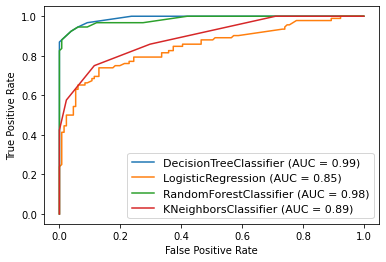

In [122]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [123]:
# saving the model to local system
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(rand_clf,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)